# Feedforward Neural Network

- MNIST
- DataLoader, Transformation
- Multilayer Neural Net, activation function
- Loss Optimizer
- Training Loop (batch training)
- Model evaluation
- GPU support

In [ ]:
import torch
import torch.nn as nn
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt

#device config

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

In [ ]:
# hyper parameters

input_size = 784 #28x28
hidden_size = 100
num_classes = 10
num_epochs = 2
batch_size = 100
learning_rate = 0.001

#MNIST

train_dataset = torchvision.datasets.MNIST(root='./data', train=True,
                                           transform = transforms.ToTensor(), download = True)
test_dataset = torchvision.datasets.MNIST(root='./data', train=False,
                                           transform = transforms.ToTensor())
train_loader = torch.utils.data.DataLoader(dataset=train_dataset, batch_size=batch_size, shuffle=True)
test_loader = torch.utils.data.DataLoader(dataset=test_dataset, batch_size=batch_size, shuffle=False)

examples = iter(train_loader)
samples, labels = examples.next()
print(samples.shape, labels.shape)



Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw




Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 503: Service Unavailable




Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 503: Service Unavailable




Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw

torch.Size([100, 1, 28, 28]) torch.Size([100])


/usr/local/lib/python3.7/dist-packages/torchvision/datasets/mnist.py:498: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at  /pytorch/torch/csrc/utils/tensor_numpy.cpp:180.)
  return torch.from_numpy(parsed.astype(m[2], copy=False)).view(*s)


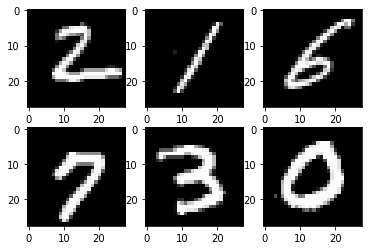

In [ ]:
for i in range(6):
  plt.subplot(2,3,i+1)
  plt.imshow(samples[i][0], cmap = 'gray')

In [ ]:
class NeuralNet(nn.Module):
  def __init__(self, input_size, hidden_size, num_classes):
     super(NeuralNet, self).__init__()
     self.input_size = input_size
     self.l1 = nn.Linear(input_size, hidden_size) 
     self.relu = nn.ReLU()
     self.l2 = nn.Linear(hidden_size, num_classes)

  def forward(self, x):
      out = self.l1(x)
      out = self.relu(out)
      out = self.l2(out)
      return out

model = NeuralNet(input_size, hidden_size, num_classes)

#loss and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr = learning_rate)

#train loop

n_total_steps = len(train_loader)
for epoch in range(num_epochs):
  for i, (images, labels) in enumerate(train_loader):
    # 100, 1, 28, 28
    # 100, 784
    images = images.reshape(-1, 28*28).to(device)
    labels = labels.to(device)

    #forward
    outputs = model(images)
    loss = criterion(outputs, labels)

    #backward
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    if (i+1) % 100 == 0:
      print(f'epoch {epoch+1} / {num_epochs}, step{i+1}/{n_total_steps}, loss = {loss.item():.4f}')

#test

with torch.no_grad():
  n_correct = 0
  n_samples = 0
  for images, labels in test_loader:
    images = images.reshape(-1, 28*28).to(device)
    labels = labels.to(device)
    outputs = model(images)

    #value, index
    _, predictions = torch.max(outputs,1)
    n_samples += labels.shape[0]
    n_correct = (predictions == labels).sum().item()

  acc = 100.0 * n_correct /n_samples
  print(f'accuracy = {acc}')

epoch 1 / 2, step100/600, loss = 0.4890
epoch 1 / 2, step200/600, loss = 0.5782
epoch 1 / 2, step300/600, loss = 0.3626
epoch 1 / 2, step400/600, loss = 0.1574
epoch 1 / 2, step500/600, loss = 0.2261
epoch 1 / 2, step600/600, loss = 0.2336
epoch 2 / 2, step100/600, loss = 0.2754
epoch 2 / 2, step200/600, loss = 0.1131
epoch 2 / 2, step300/600, loss = 0.1603
epoch 2 / 2, step400/600, loss = 0.2392
epoch 2 / 2, step500/600, loss = 0.2133
epoch 2 / 2, step600/600, loss = 0.1388
accuracy = 0.92
